In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score, roc_auc_score, classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
dataset = pd.read_csv('C:\\Users\\Josham Kadiebwe\\Desktop\\python\\Datasets\\Dataset2\\hankypanky_com.csv')

In [3]:
dataset.head()

,mrp,price,product_category,rating,review_count,Silk,Cotton,Modal,Nylon,Rayon,Spandex,Elastane,polyester,Viscose,Polyurethane,Classe
0,85.0,85.0,Collections,0.0,0,0,0,0,100.0,0,0.0,0,0,0,0,0
1,36.0,36.0,Thongs,0.0,0,0,0,0,0.0,0,0.0,0,100,0,0,1
2,69.0,69.0,Collections,0.0,0,0,0,0,82.0,0,18.0,0,0,0,0,0
3,86.0,86.0,Collections,0.0,0,0,0,0,90.0,0,10.0,0,0,0,0,0
4,25.0,25.0,Collections,0.0,0,0,0,0,89.0,0,11.0,0,0,0,0,0


In [4]:
dataset.shape

(786, 16)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mrp               786 non-null    float64
 1   price             786 non-null    float64
 2   product_category  786 non-null    object 
 3   rating            786 non-null    float64
 4   review_count      786 non-null    int64  
 5   Silk              786 non-null    int64  
 6   Cotton            786 non-null    int64  
 7   Modal             786 non-null    int64  
 8   Nylon             786 non-null    float64
 9   Rayon             786 non-null    int64  
 10  Spandex           786 non-null    float64
 11  Elastane          786 non-null    int64  
 12  polyester         786 non-null    int64  
 13  Viscose           786 non-null    int64  
 14  Polyurethane      786 non-null    int64  
 15  Classe            786 non-null    int64  
dtypes: float64(5), int64(10), object(1)
memory u

In [6]:
dataset.isnull().sum()

mrp                 0
price               0
product_category    0
rating              0
review_count        0
Silk                0
Cotton              0
Modal               0
Nylon               0
Rayon               0
Spandex             0
Elastane            0
polyester           0
Viscose             0
Polyurethane        0
Classe              0
dtype: int64

In [7]:
dataset['Classe'].value_counts()

0    563
1    223
Name: Classe, dtype: int64

In [8]:
dataset.nunique()

mrp                 102
price               116
product_category      5
rating                7
review_count          9
Silk                  2
Cotton                5
Modal                 3
Nylon                22
Rayon                10
Spandex              17
Elastane              2
polyester             6
Viscose               2
Polyurethane          2
Classe                2
dtype: int64

# Analyse et visualisation des données

In [9]:
def data_graph (axis, width, height):
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    for p in axis.patches: 
        axis.annotate ("{0:.1f}".format(p.get_height()), (p.get_x()+width, p.get_height()+height))

Text(0.5, 1.0, 'Distribution des classes')

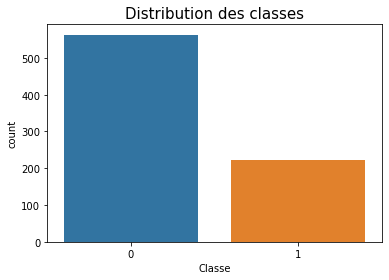

In [10]:
sns.countplot(x=dataset.Classe).set_title('Distribution des classes', size=15)

In [11]:
data0 = dataset.groupby('Classe')["rating","review_count"].sum().reset_index()
data0.head()

<ipython-input-11-28d352319dbb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data0 = dataset.groupby('Classe')["rating","review_count"].sum().reset_index()


,Classe,rating,review_count
0,0,458.0,230
1,1,132.0,47


In [12]:
data1=data0[["Classe","review_count"]]
data1.head()

,Classe,review_count
0,0,230
1,1,47


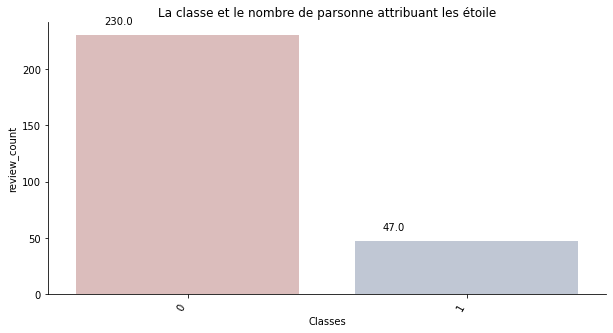

In [13]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Classe", y="review_count", data=data1, palette="vlag_r")
plt.title("La classe et le nombre de parsonne attribuant les étoile")
plt.xticks(rotation=60, ha='right')
plt.xlabel("Classes")
plt.ylabel("review_count")
data_graph(ax, 0.1, 10)
plt.show()

In [14]:
data2=data0[["Classe","rating"]]
data2.head()

,Classe,rating
0,0,458.0
1,1,132.0


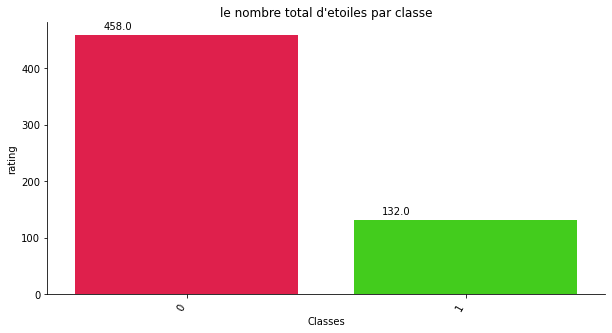

In [15]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Classe", y="rating", data=data2, palette='prism_r')
plt.title("le nombre total d'etoiles par classe")
plt.xticks(rotation=60, ha='right')
plt.xlabel("Classes")
plt.ylabel("rating")
data_graph(ax, 0.1, 10)
plt.show()

In [16]:
data3 = dataset.groupby('rating')["price","review_count"].sum().reset_index()
data3.head()

<ipython-input-16-71309b3e5b03>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data3 = dataset.groupby('rating')["price","review_count"].sum().reset_index()


,rating,price,review_count
0,0.0,39484.71,0
1,3.0,294.00,7
2,3.5,60.00,4
3,4.0,554.00,24
4,4.8,50.00,8


In [17]:
data4=data3[["rating","review_count"]]
data4.head()

,rating,review_count
0,0.0,0
1,3.0,7
2,3.5,4
3,4.0,24
4,4.8,8


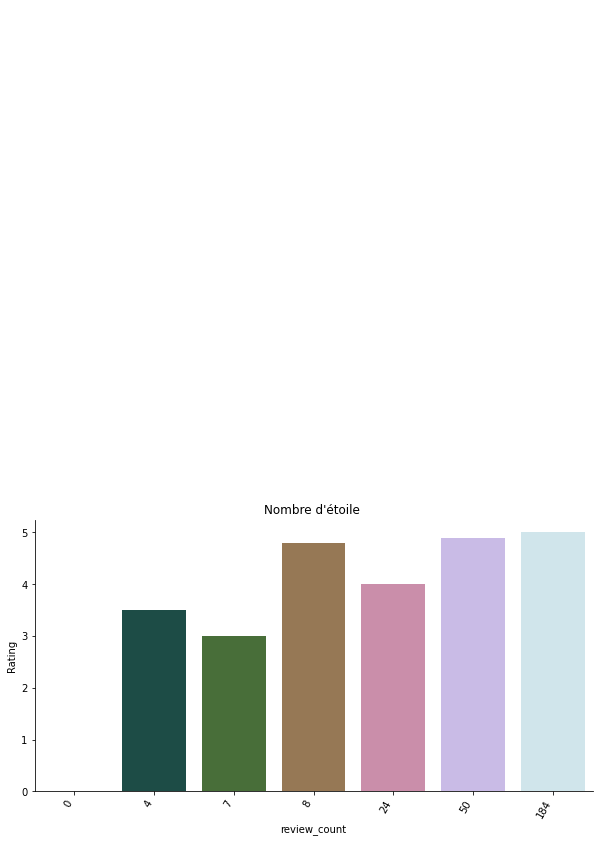

In [18]:
data5 = data4.sort_values("review_count", ascending=True)

plt.figure(figsize=(10,5))
ax = sns.barplot(x="review_count", y="rating", data=data5, palette="cubehelix")
plt.title("Nombre d'étoile ")
plt.xticks(rotation=60, ha='right')
plt.xlabel("review_count")
plt.ylabel("Rating")
data_graph(ax, 0.1, 10)
plt.show()

In [19]:
data6=data3[["rating","price"]]
data6.head()

,rating,price
0,0.0,39484.71
1,3.0,294.00
2,3.5,60.00
3,4.0,554.00
4,4.8,50.00


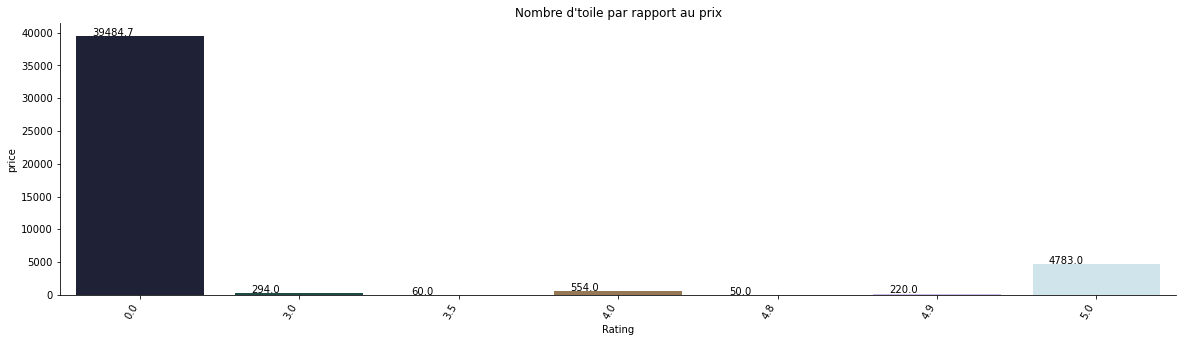

In [20]:
data7 = data6.sort_values("price", ascending=False)

plt.figure(figsize=(20,5))
ax = sns.barplot(x="rating", y="price", data=data7[ :20], palette="cubehelix")
plt.title("Nombre d'toile par rapport au prix")
plt.xticks(rotation=60, ha='right')
plt.xlabel("Rating")
plt.ylabel("price")
data_graph(ax, 0.1, 10)
plt.show()

<AxesSubplot:>

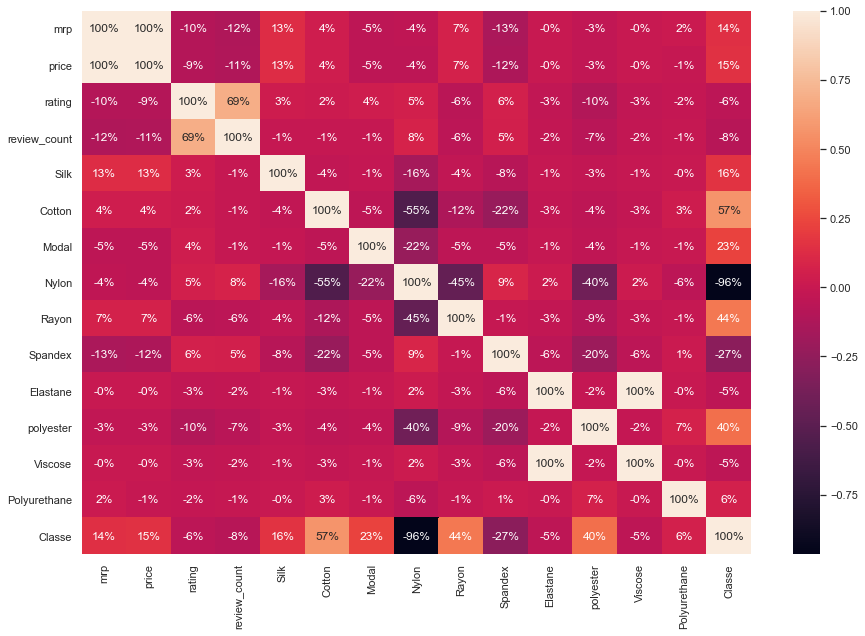

In [21]:
sns.set(rc={'figure.figsize': (15,10)})

corr = dataset.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt='.0%')

In [22]:
import warnings
from sklearn.exceptions import ConvergenceWarning

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    

C:\Users\JoshamKadiebwe\anaconda32\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\JoshamKadiebwe\anaconda32\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\JoshamKadiebwe\anaconda32\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\JoshamKadiebwe\anaconda32\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\JoshamKadiebwe\anaconda32\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\JoshamKadiebwe\anaconda32\lib\site-packages\seaborn\distributions.py:305: UserWarning:

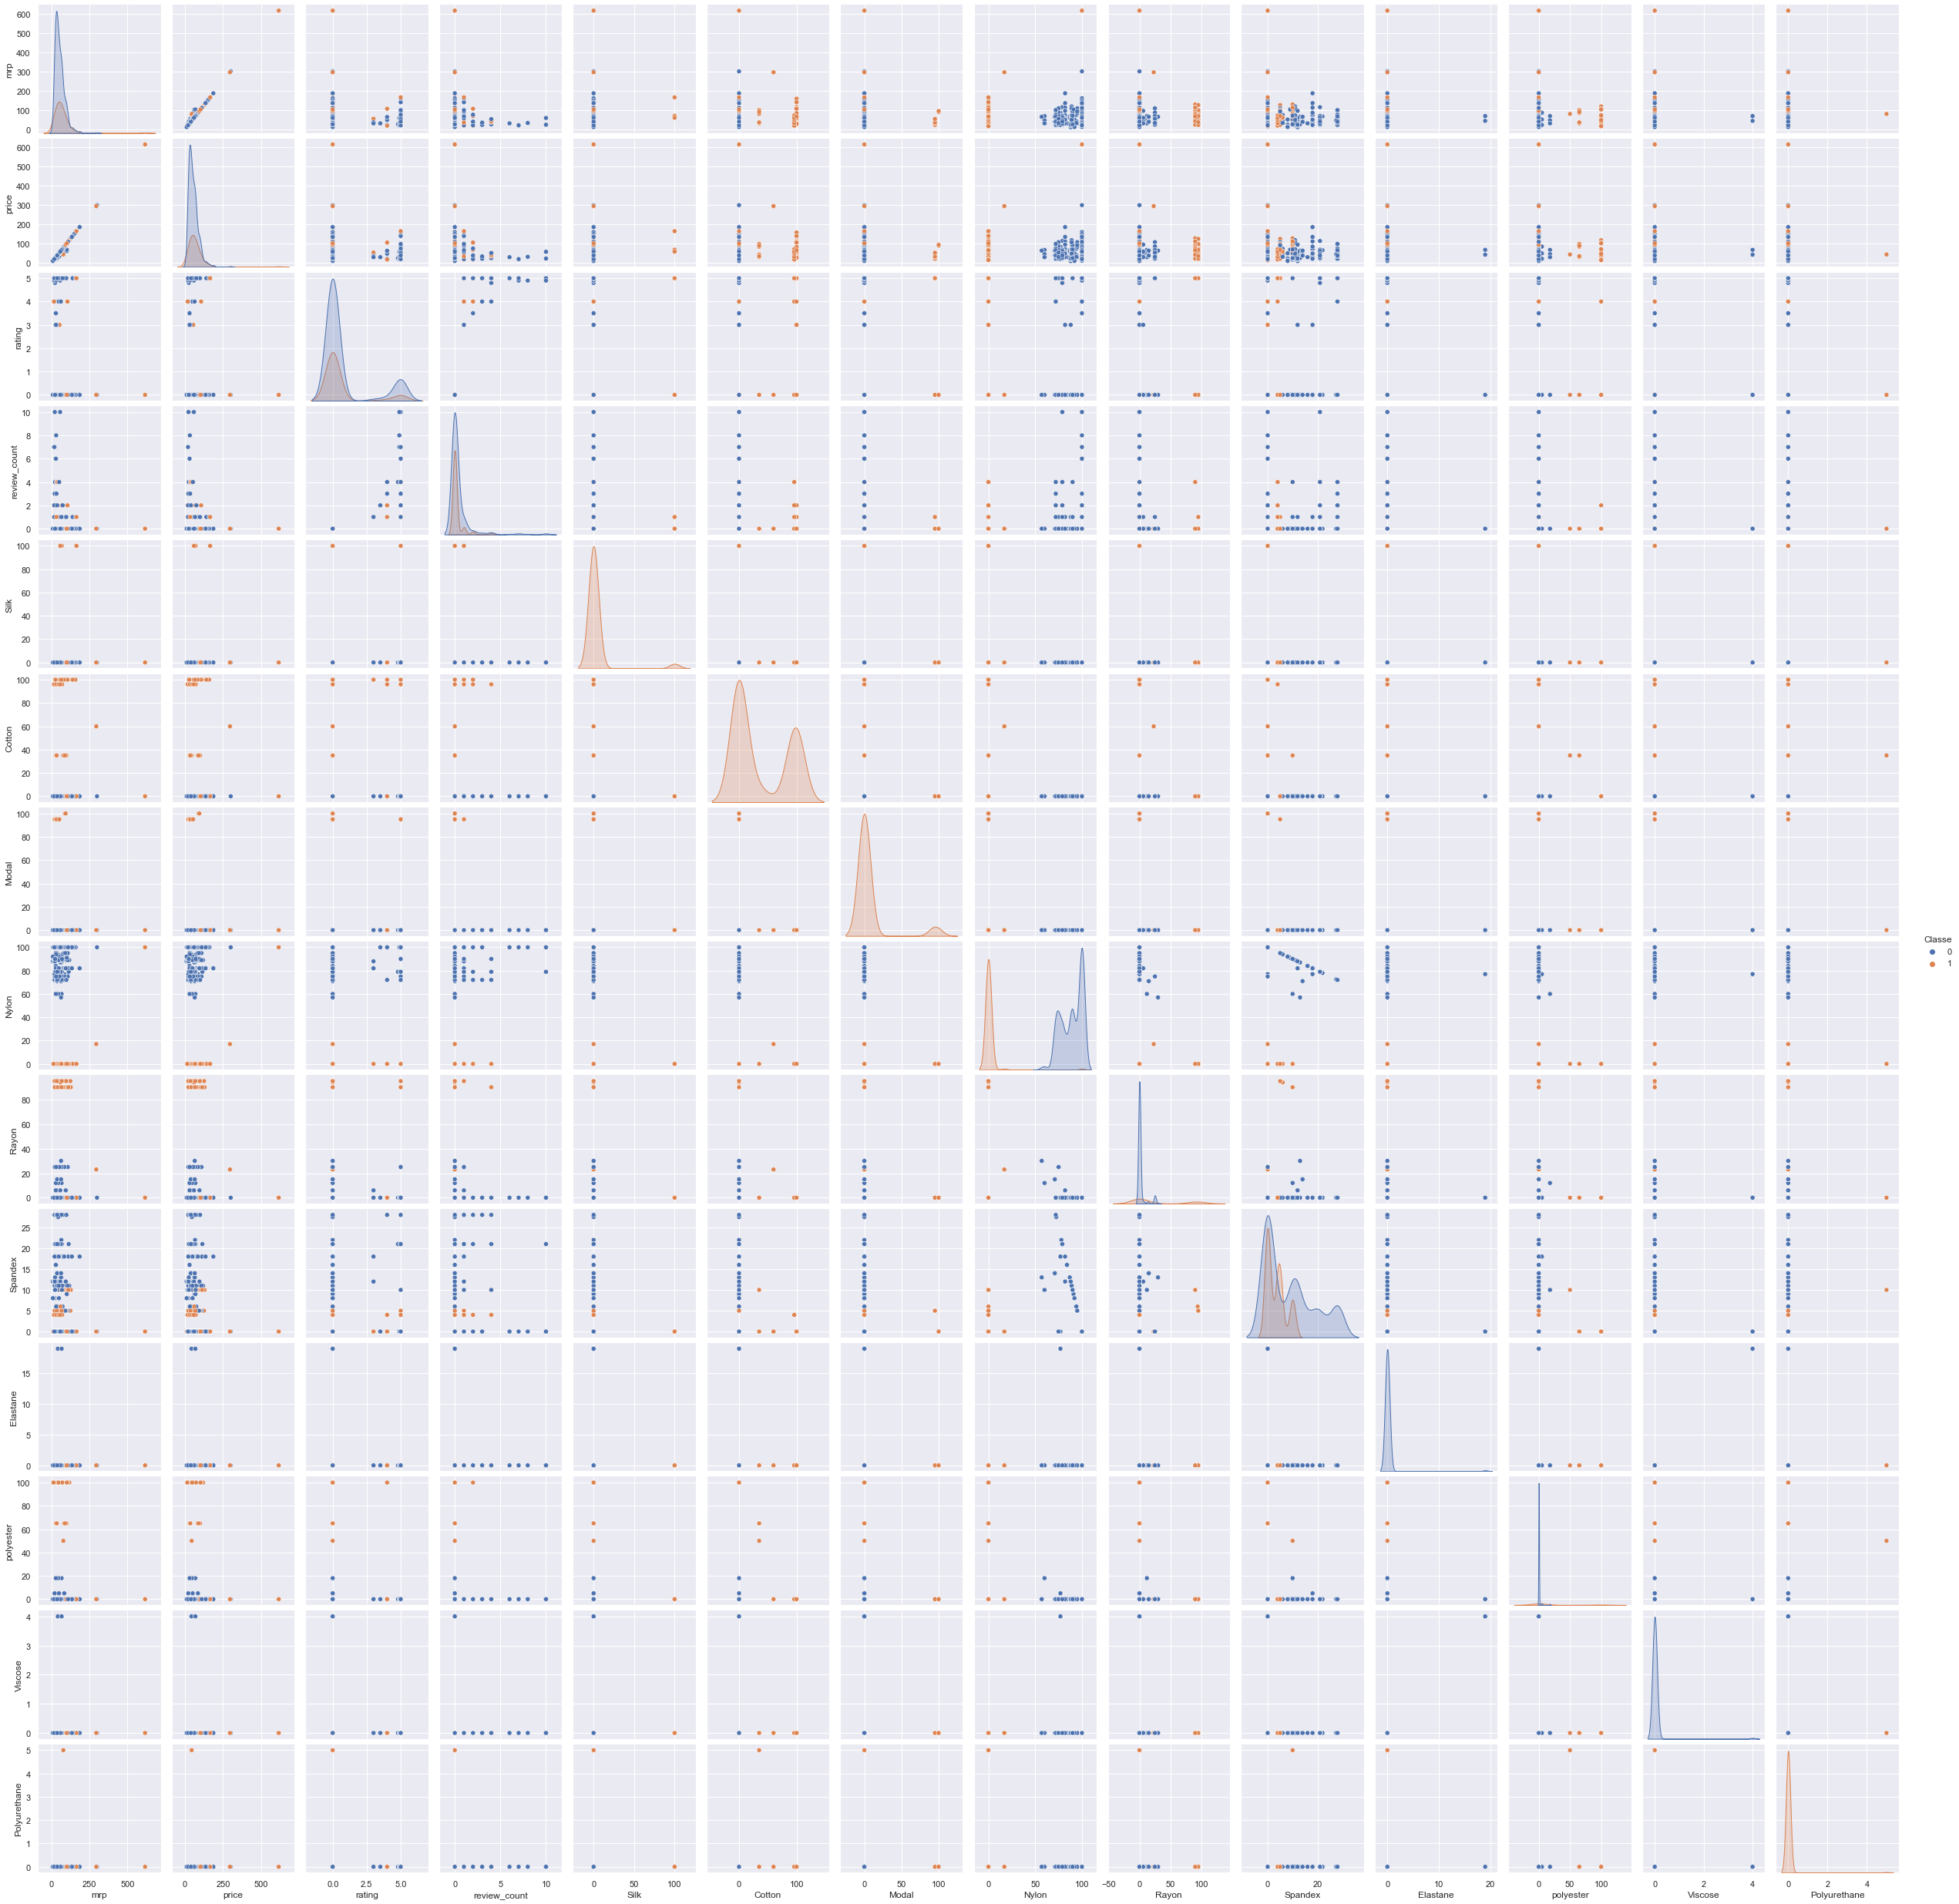

In [23]:
sns.pairplot(dataset, hue='Classe')

# Preprocessing

In [24]:
data=pd.get_dummies(dataset, columns=['product_category'], drop_first=True)
data

,mrp,price,rating,review_count,Silk,Cotton,Modal,Nylon,Rayon,Spandex,Elastane,polyester,Viscose,Polyurethane,Classe,product_category_Collections,product_category_Lingerie,product_category_Panties,product_category_Thongs
0,85.0,85.0,0.0,0,0,0,0,100.0,0,0.0,0,0,0,0,0,1,0,0,0
1,36.0,36.0,0.0,0,0,0,0,0.0,0,0.0,0,100,0,0,1,0,0,0,1
2,69.0,69.0,0.0,0,0,0,0,82.0,0,18.0,0,0,0,0,0,1,0,0,0
3,86.0,86.0,0.0,0,0,0,0,90.0,0,10.0,0,0,0,0,0,1,0,0,0
4,25.0,25.0,0.0,0,0,0,0,89.0,0,11.0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,25.0,25.0,0.0,0,0,0,0,100.0,0,0.0,0,0,0,0,0,0,0,0,1
782,102.0,102.0,0.0,0,0,0,0,0.0,0,0.0,0,100,0,0,1,0,1,0,0
783,59.0,59.0,0.0,0,0,0,0,100.0,0,0.0,0,0,0,0,0,0,0,0,0
784,20.0,20.0,5.0,2,0,0,0,100.0,0,0.0,0,0,0,0,0,1,0,0,0


Split data to the matrice X and y

In [25]:
X = data.drop(["Classe"], axis=1)
y= data['Classe']

In [26]:
X.head()

,mrp,price,rating,review_count,Silk,Cotton,Modal,Nylon,Rayon,Spandex,Elastane,polyester,Viscose,Polyurethane,product_category_Collections,product_category_Lingerie,product_category_Panties,product_category_Thongs
0,85.0,85.0,0.0,0,0,0,0,100.0,0,0.0,0,0,0,0,1,0,0,0
1,36.0,36.0,0.0,0,0,0,0,0.0,0,0.0,0,100,0,0,0,0,0,1
2,69.0,69.0,0.0,0,0,0,0,82.0,0,18.0,0,0,0,0,1,0,0,0
3,86.0,86.0,0.0,0,0,0,0,90.0,0,10.0,0,0,0,0,1,0,0,0
4,25.0,25.0,0.0,0,0,0,0,89.0,0,11.0,0,0,0,0,1,0,0,0


Division des données en traning et test set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((628, 18), (158, 18), (628,), (158,))

In [28]:
y_test.value_counts()

0    112
1     46
Name: Classe, dtype: int64

Mettre les données en échelle

In [29]:
#features_scaling

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

X_train

array([[-0.04009223, -0.02628492, -0.43179251, ..., -0.36827146,
        -0.36267276, -0.39833602],
       [-0.62112118, -0.60528732,  1.28444607, ..., -0.36827146,
        -0.36267276, -0.39833602],
       [ 0.06750572,  0.08093775, -0.43179251, ..., -0.36827146,
        -0.36267276, -0.39833602],
       ...,
       [-0.38440568, -0.36939745, -0.43179251, ..., -0.36827146,
        -0.36267276,  2.5104433 ],
       [-0.104651  , -0.09061852, -0.43179251, ..., -0.36827146,
        -0.36267276, -0.39833602],
       [ 0.19662327,  0.20960495, -0.43179251, ..., -0.36827146,
        -0.36267276, -0.39833602]])

# Entrainement du modèle

1.RandomForest

In [30]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_train, y_train.ravel())
y_pred_rfc=rfc.predict(X_test)
print(rfc.score(X_test, y_test))
print('Precision du modèle avec 100 arbres: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rfc)))

1.0
Precision du modèle avec 100 arbres: 1.0000


In [31]:
from sklearn.metrics import confusion_matrix

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print('Matrice de confusion\n\n', cm_rfc)
print('\n Vrais Positives(VP)', cm_rfc[0,0])
print('\n vrais Negatives(VN)', cm_rfc[1,1])
print('\n Faux Negatives(FN) ', cm_rfc[0,1])
print('\n Faux Positives(FP)', cm_rfc[1,0])

Matrice de confusion

 [[112   0]
 [  0  46]]

 Vrais Positives(VP) 112

 vrais Negatives(VN) 46

 Faux Negatives(FN)  0

 Faux Positives(FP) 0


<AxesSubplot:>

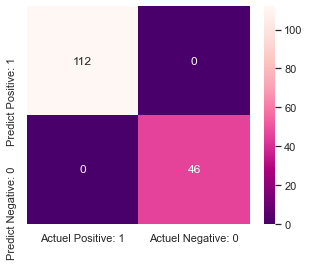

In [32]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_rfc, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='RdPu_r')

In [33]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

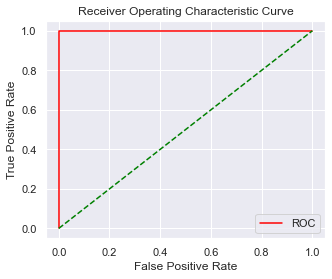

In [34]:
fper, tper, thresholds = roc_curve(y_test, y_pred_rfc)
plot_roc_curve(fper, tper)

In [35]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        46

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [36]:
print(accuracy_score(y_test, y_pred_rfc))
print(f1_score(y_test, y_pred_rfc))
print(roc_auc_score(y_test, y_pred_rfc))

1.0
1.0
1.0


2.Algorthme SVM

In [37]:
svc= SVC()
svc.fit(X_train, y_train)
y_pred_svm = svc.predict(X_test)

print(svc.score(X_test, y_test))
print('précision du modèle support vector machine : {0:0.4f}' .format(accuracy_score(y_test, y_pred_svm)))

1.0
précision du modèle support vector machine : 1.0000


In [38]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

print('Matrice de confusion\n\n', cm_svm)
print('\n Vrais Positives(VP)', cm_svm[0,0])
print('\n vrais Negatives(VN)', cm_svm[1,1])
print('\n Faux Negatives(FN)', cm_svm[0,1])
print('\n Faux Positives(FP)', cm_svm[1,0])

Matrice de confusion

 [[112   0]
 [  0  46]]

 Vrais Positives(VP) 112

 vrais Negatives(VN) 46

 Faux Negatives(FN) 0

 Faux Positives(FP) 0


<AxesSubplot:>

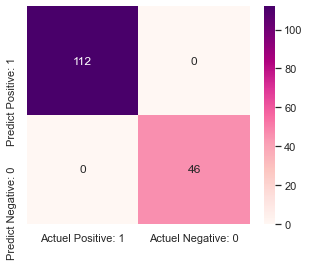

In [39]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_svm, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='RdPu')

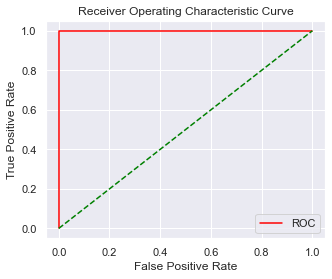

In [40]:
fper, tper, thresholds = roc_curve(y_test, y_pred_svm)
plot_roc_curve(fper, tper)

In [41]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        46

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [42]:
print(accuracy_score(y_test, y_pred_svm))
print(f1_score(y_test, y_pred_svm))
print(roc_auc_score(y_test, y_pred_svm))

1.0
1.0
1.0


3.Regression logistique

In [43]:
#Regression logistique
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred_log =log.predict(X_test)
print(log.score(X_test, y_test))
print('Précision du modèle Regression logistique: {0:0.4f}' .format(accuracy_score(y_test.ravel(), y_pred_log)))

1.0
Précision du modèle Regression logistique: 1.0000


In [44]:
cm_log= confusion_matrix(y_test, y_pred_log)

print('Matrice de confusion\n\n', cm_log)
print('\n Vrais Positives(VP)', cm_log[0,0])
print('\n vrais Negatives(VN)', cm_log[1,1])
print('\n Faux Negatives(FN)', cm_log[0,1])
print('\n Faux Positives(FP)', cm_log[1,0])

Matrice de confusion

 [[112   0]
 [  0  46]]

 Vrais Positives(VP) 112

 vrais Negatives(VN) 46

 Faux Negatives(FN) 0

 Faux Positives(FP) 0


<AxesSubplot:>

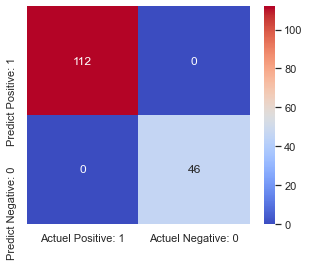

In [45]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_log, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='coolwarm')

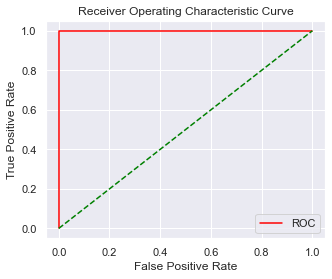

In [46]:
fper, tper, thresholds = roc_curve(y_test, y_pred_log)
plot_roc_curve(fper, tper)

In [47]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        46

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [48]:
print(accuracy_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))
print(roc_auc_score(y_test, y_pred_log))

1.0
1.0
1.0


# Cross_validation

1.random_Forest

In [49]:
kfold = KFold(n_splits =10, shuffle = True, random_state=42)

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_scores= cross_val_score(rfc_100, X, y.ravel(), cv = kfold)
#pourcentage de Validation croisée avec randomforest
print('validation croisée stratifiée avec RandomForest:\n\n{}'.format(rfc_scores))

validation croisée stratifiée avec RandomForest:

[1.         1.         1.         1.         1.         0.98734177
 1.         1.         1.         0.98717949]


2.SVM

In [50]:
kfold = KFold(n_splits =10, shuffle = True, random_state=42)

svc = SVC()
svc_scores= cross_val_score(svc, X, y.ravel(), cv = kfold)
#pourcentage de Validation croisée avec randomforest
print('validation croisée stratifiée avec support vector machine:\n\n{}'.format(svc_scores))

validation croisée stratifiée avec support vector machine:

[1.         1.         1.         0.98734177 1.         1.
 1.         1.         1.         1.        ]


3.Regression Logistique

In [51]:
import warnings
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [52]:
kfold = KFold(n_splits =10, shuffle = True, random_state=42)

log= LogisticRegression(solver='lbfgs',max_iter=100 )
log_scores= cross_val_score(log, X, y.ravel(), cv = kfold)
#pourcentage de Validation croisée avec RL
print('validation croisée stratifiée avec Regression logistique:\n\n{}'.format(log_scores))

validation croisée stratifiée avec Regression logistique:

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Equilibrage des données en appliquant deux techniques d'equilibrages(Suréchantillonage et souséchantillonage)

In [53]:
dataset['Classe'].value_counts(normalize=True)

0    0.716285
1    0.283715
Name: Classe, dtype: float64

Text(0.5, 1.0, 'Distribution de classes')

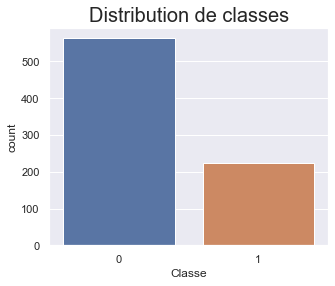

In [54]:
sns.countplot(x=dataset.Classe).set_title('Distribution de classes', size=20)

# 11. Suréchantillonnage avec RandomOversampling

In [55]:
#Spliter les données pour avoir la matrices X et y
X=data.drop(['Classe'], axis=1)
y=data['Classe']

In [56]:
#Spliter les données en données d'entrainementet de test
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size =0.2, random_state=0)
y_test.value_counts()

0    112
1     46
Name: Classe, dtype: int64

In [57]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
y_train_res.value_counts()

1    451
0    451
Name: Classe, dtype: int64

Text(0.5, 1.0, 'Distribution de classes')

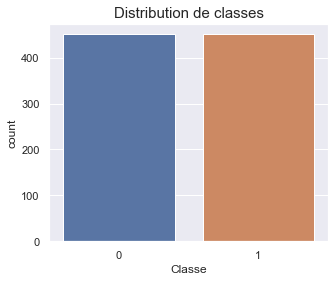

In [58]:
sns.countplot(x=y_train_res).set_title('Distribution de classes', size=15)

In [59]:
#features_scaling

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X_train_res)
X_test = scale.fit_transform(X_test)

X_train

array([[-0.0987955 , -0.08845944, -0.44132066, ..., -0.37460472,
        -0.35707142, -0.39173037],
       [-0.55665766, -0.54530383,  1.25500562, ..., -0.37460472,
        -0.35707142, -0.39173037],
       [-0.01400621, -0.00385862, -0.44132066, ..., -0.37460472,
        -0.35707142, -0.39173037],
       ...,
       [ 0.73213953,  0.74062854, -0.44132066, ..., -0.37460472,
        -0.35707142, -0.39173037],
       [-0.40403694, -0.39302236, -0.44132066, ..., -0.37460472,
        -0.35707142, -0.39173037],
       [-0.81102553, -0.79910627, -0.44132066, ..., -0.37460472,
         2.80056017, -0.39173037]])

# Entrainement du modèle RandomOversampling

1.RandomForest

In [60]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_train, y_train_res.ravel())
y_pred_rfc=rfc.predict(X_test)
print(rfc.score(X_test, y_test))
print('Precision du modèle avec 100 arbres: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rfc)))

1.0
Precision du modèle avec 100 arbres: 1.0000


In [61]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print('Matrice de confusion\n\n', cm_rfc)
print('\n Vrais Positives(VP)', cm_rfc[0,0])
print('\n vrais Negatives(VN)', cm_rfc[1,1])
print('\n Faux Negatives(FN)', cm_rfc[0,1])
print('\n Faux Positives(FP)', cm_rfc[1,0])

Matrice de confusion

 [[112   0]
 [  0  46]]

 Vrais Positives(VP) 112

 vrais Negatives(VN) 46

 Faux Negatives(FN) 0

 Faux Positives(FP) 0


<AxesSubplot:>

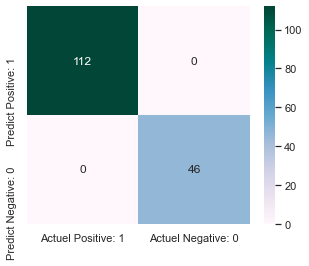

In [62]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_rfc, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='PuBuGn')

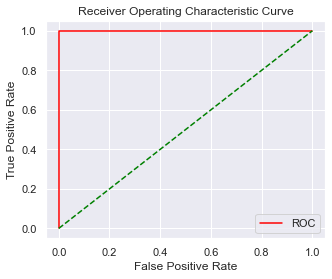

In [63]:
fper, tper, thresholds = roc_curve(y_test, y_pred_rfc)
plot_roc_curve(fper, tper)

In [64]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        46

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [65]:
print(classification_report_imbalanced(y_test, y_pred_rfc))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00       112
          1       1.00      1.00      1.00      1.00      1.00      1.00        46

avg / total       1.00      1.00      1.00      1.00      1.00      1.00       158



In [66]:
print(accuracy_score(y_test, y_pred_rfc))
print(f1_score(y_test, y_pred_rfc))
print(roc_auc_score(y_test, y_pred_rfc))

1.0
1.0
1.0


In [67]:
tp = cm_rfc[0,0]
tn = cm_rfc[1,1]
fn = cm_rfc[0,1]
fp = cm_rfc[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_rfc)*100)

Accuracy 100.0
taux d'erreur 0.0
Sensitivity 100.0
Specitivity 100.0
Precision 100.0
Rappel 100.0
F1-score 100.0
MCC 100.0


2.Algorithme SVM

In [68]:
svc= SVC()
svc.fit(X_train, y_train_res.ravel())
y_pred_svm = svc.predict(X_test)

print(svc.score(X_test, y_test))
print('précision du modèle support vector machine : {0:0.4f}' .format(accuracy_score(y_test, y_pred_svm)))

1.0
précision du modèle support vector machine : 1.0000


In [69]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

print('Matrice de confusion\n\n', cm_svm)
print('\n Vrais Positives(VP)', cm_svm[0,0])
print('\n vrais Negatives(VN)', cm_svm[1,1])
print('\n Faux Negatives(FN)', cm_svm[0,1])
print('\n Faux Positives(FP)', cm_svm[1,0])

Matrice de confusion

 [[112   0]
 [  0  46]]

 Vrais Positives(VP) 112

 vrais Negatives(VN) 46

 Faux Negatives(FN) 0

 Faux Positives(FP) 0


<AxesSubplot:>

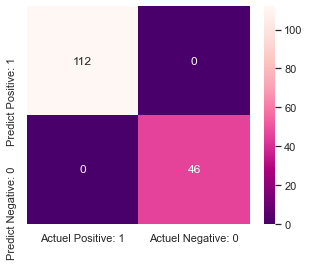

In [70]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_svm, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='RdPu_r')

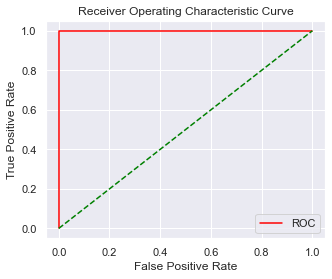

In [71]:
fper, tper, thresholds = roc_curve(y_test, y_pred_svm)
plot_roc_curve(fper, tper)

In [72]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        46

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [73]:
print(classification_report_imbalanced(y_test, y_pred_svm))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00       112
          1       1.00      1.00      1.00      1.00      1.00      1.00        46

avg / total       1.00      1.00      1.00      1.00      1.00      1.00       158



In [74]:
print(accuracy_score(y_test, y_pred_svm))
print(f1_score(y_test, y_pred_svm))
print(roc_auc_score(y_test, y_pred_svm))

1.0
1.0
1.0


In [75]:
tp = cm_svm[0,0]
tn = cm_svm[1,1]
fn = cm_svm[0,1]
fp = cm_svm[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_svm)*100)

Accuracy 100.0
taux d'erreur 0.0
Sensitivity 100.0
Specitivity 100.0
Precision 100.0
Rappel 100.0
F1-score 100.0
MCC 100.0


3.Regression Logistique

In [76]:
#Regression logistique
log = LogisticRegression()
log.fit(X_train, y_train_res.ravel())
y_pred_log =log.predict(X_test)
print(log.score(X_test, y_test))
print('Précision du modèle Regression logistique: {0:0.4f}' .format(accuracy_score(y_test.ravel(), y_pred_log)))

1.0
Précision du modèle Regression logistique: 1.0000


In [77]:
cm_log= confusion_matrix(y_test, y_pred_log)

print('Matrice de confusion\n\n', cm_log)
print('\n Vrais Positives(VP)', cm_log[0,0])
print('\n vrais Negatives(VN)', cm_log[1,1])
print('\n Faux Negatives(FN)', cm_log[0,1])
print('\n Faux Positives(FP)', cm_log[1,0])

Matrice de confusion

 [[112   0]
 [  0  46]]

 Vrais Positives(VP) 112

 vrais Negatives(VN) 46

 Faux Negatives(FN) 0

 Faux Positives(FP) 0


<AxesSubplot:>

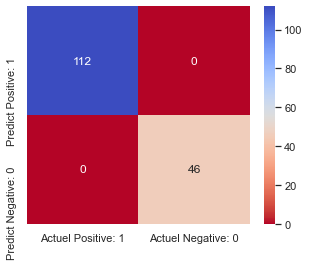

In [78]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_log, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='coolwarm_r')

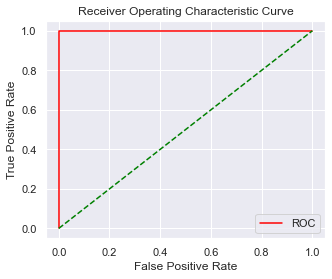

In [79]:
fper, tper, thresholds = roc_curve(y_test, y_pred_log)
plot_roc_curve(fper, tper)

In [80]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        46

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [81]:
print(classification_report_imbalanced(y_test, y_pred_log))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00       112
          1       1.00      1.00      1.00      1.00      1.00      1.00        46

avg / total       1.00      1.00      1.00      1.00      1.00      1.00       158



In [82]:
print(accuracy_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))
print(roc_auc_score(y_test, y_pred_log))

1.0
1.0
1.0


In [83]:
tp = cm_log[0,0]
tn = cm_log[1,1]
fn = cm_log[0,1]
fp = cm_log[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_log)*100)

Accuracy 100.0
taux d'erreur 0.0
Sensitivity 100.0
Specitivity 100.0
Precision 100.0
Rappel 100.0
F1-score 100.0
MCC 100.0


# 12.Techniques de suréchantillonage : Suréchantillonnage avec rétrécissement(shrinkage)

In [84]:
#Spliter les données pour avoir la matrices X et y
X=data.drop(['Classe'], axis=1)
y=data['Classe']

In [85]:
#Spliter les données en données d'entrainementet de test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size =0.2, random_state=0)

In [86]:
y_train.value_counts()

0    451
1    177
Name: Classe, dtype: int64

In [87]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0, shrinkage = 0.1)

X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
y_train_res.value_counts()

1    451
0    451
Name: Classe, dtype: int64

Text(0.5, 1.0, 'Distribution de classes')

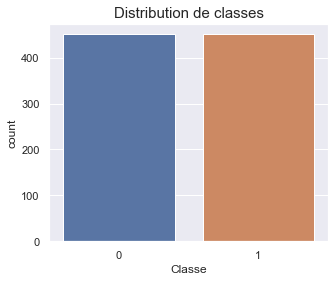

In [88]:
sns.countplot(x=y_train_res).set_title('Distribution de classes', size=15)

In [89]:
#features_scaling
scale = StandardScaler()
X_train = scale.fit_transform(X_train_res)
X_test = scale.fit_transform(X_test)

X_train

array([[-0.09994011, -0.0886718 , -0.4408776 , ..., -0.33497336,
        -0.33497336, -0.35707142],
       [-0.55702955, -0.54548347,  1.25503487, ..., -0.33497336,
        -0.33497336, -0.35707142],
       [-0.01529392, -0.00407705, -0.4408776 , ..., -0.33497336,
        -0.33497336, -0.35707142],
       ...,
       [ 0.70565802,  0.70914249, -0.37926405, ..., -0.33497336,
        -0.33497336, -0.35707142],
       [-0.47780129, -0.46699172, -0.37065412, ..., -0.33497336,
        -0.33497336, -0.35707142],
       [-0.80588955, -0.82881913, -0.33622726, ..., -0.33497336,
        -0.33497336, -0.35707142]])

# Entrainement du modèle avec Shrinkage

 1.RandomForest ou forêt aléatoire

In [90]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_train, y_train_res.ravel())
y_pred_rfc=rfc.predict(X_test)
print(rfc.score(X_test, y_test))
print('Precision du modèle avec 100 arbres: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rfc)))

0.569620253164557
Precision du modèle avec 100 arbres: 0.5696


In [91]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print('Matrice de confusion\n\n', cm_rfc)
print('\n Vrais Positives(VP)', cm_rfc[0,0])
print('\n vrais Negatives(VN)', cm_rfc[1,1])
print('\n Faux Negatives(FN)', cm_rfc[0,1])
print('\n Faux Positives(FP)', cm_rfc[1,0])

Matrice de confusion

 [[44 68]
 [ 0 46]]

 Vrais Positives(VP) 44

 vrais Negatives(VN) 46

 Faux Negatives(FN) 68

 Faux Positives(FP) 0


<AxesSubplot:>

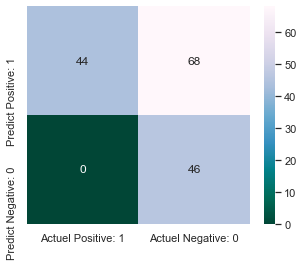

In [92]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_rfc, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='PuBuGn_r')

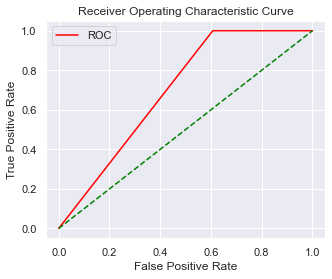

In [93]:
fper, tper, thresholds = roc_curve(y_test, y_pred_rfc)
plot_roc_curve(fper, tper)

In [94]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.39      0.56       112
           1       0.40      1.00      0.57        46

    accuracy                           0.57       158
   macro avg       0.70      0.70      0.57       158
weighted avg       0.83      0.57      0.57       158



In [95]:
print(classification_report_imbalanced(y_test, y_pred_rfc))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.39      1.00      0.56      0.63      0.37       112
          1       0.40      1.00      0.39      0.57      0.63      0.42        46

avg / total       0.83      0.57      0.82      0.57      0.63      0.38       158



In [96]:
print(accuracy_score(y_test, y_pred_rfc))
print(f1_score(y_test, y_pred_rfc))
print(roc_auc_score(y_test, y_pred_rfc))

0.569620253164557
0.575
0.6964285714285714


In [97]:
tp = cm_rfc[0,0]
tn = cm_rfc[1,1]
fn = cm_rfc[0,1]
fp = cm_rfc[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_rfc)*100)

Accuracy 56.9620253164557
taux d'erreur 43.037974683544306
Sensitivity 39.285714285714285
Specitivity 100.0
Precision 100.0
Rappel 39.285714285714285
F1-score 56.41025641025641
MCC 39.81473386299918


2.Algorithme SVM

In [98]:
svc= SVC()
svc.fit(X_train, y_train_res.ravel())
y_pred_svm = svc.predict(X_test)

print(svc.score(X_test, y_test))
print('précision du modèle support vector machine : {0:0.4f}' .format(accuracy_score(y_test, y_pred_svm)))

1.0
précision du modèle support vector machine : 1.0000


In [99]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

print('Matrice de confusion\n\n', cm_svm)
print('\n Vrais Positives(VP)', cm_svm[0,0])
print('\n vrais Negatives(VN)', cm_svm[1,1])
print('\n Faux Negatives(FN)', cm_svm[0,1])
print('\n Faux Positives(FP)', cm_svm[1,0])

Matrice de confusion

 [[112   0]
 [  0  46]]

 Vrais Positives(VP) 112

 vrais Negatives(VN) 46

 Faux Negatives(FN) 0

 Faux Positives(FP) 0


<AxesSubplot:>

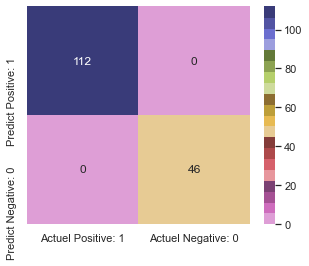

In [100]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_svm, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='tab20b_r')

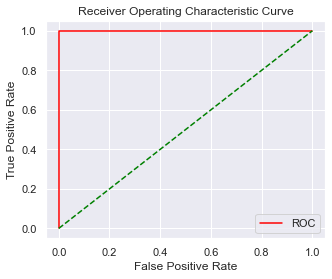

In [101]:
fper, tper, thresholds = roc_curve(y_test, y_pred_svm)
plot_roc_curve(fper, tper)

In [102]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        46

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [103]:
print(classification_report_imbalanced(y_test, y_pred_svm))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00       112
          1       1.00      1.00      1.00      1.00      1.00      1.00        46

avg / total       1.00      1.00      1.00      1.00      1.00      1.00       158



In [104]:
print(accuracy_score(y_test, y_pred_svm))
print(f1_score(y_test, y_pred_svm))
print(roc_auc_score(y_test, y_pred_svm))

1.0
1.0
1.0


In [105]:
tp = cm_svm[0,0]
tn = cm_svm[1,1]
fn = cm_svm[0,1]
fp = cm_svm[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_svm)*100)

Accuracy 100.0
taux d'erreur 0.0
Sensitivity 100.0
Specitivity 100.0
Precision 100.0
Rappel 100.0
F1-score 100.0
MCC 100.0


3. Regresssion Logistique

In [106]:
#Regression logistique
log = LogisticRegression()
log.fit(X_train, y_train_res)
y_pred_log =log.predict(X_test)
print(log.score(X_test, y_test))
print('Précision du modèle Regression logistique: {0:0.4f}' .format(accuracy_score(y_test.ravel(), y_pred_log)))

1.0
Précision du modèle Regression logistique: 1.0000


In [107]:
cm_log= confusion_matrix(y_test, y_pred_log)

print('Matrice de confusion\n\n', cm_log)
print('\n Vrais Positives(VP)', cm_log[0,0])
print('\n vrais Negatives(VN)', cm_log[1,1])
print('\n Faux Negatives(FN)', cm_log[0,1])
print('\n Faux Positives(FP)', cm_log[1,0])

Matrice de confusion

 [[112   0]
 [  0  46]]

 Vrais Positives(VP) 112

 vrais Negatives(VN) 46

 Faux Negatives(FN) 0

 Faux Positives(FP) 0


<AxesSubplot:>

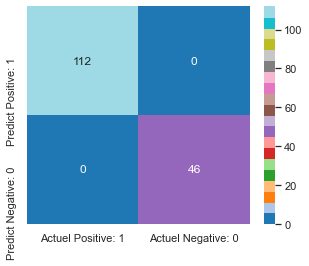

In [108]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_log, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='tab20')

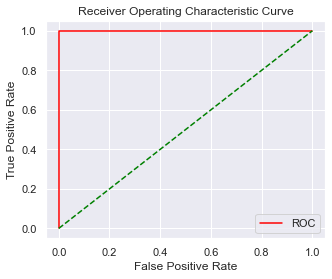

In [109]:
fper, tper, thresholds = roc_curve(y_test, y_pred_log)
plot_roc_curve(fper, tper)

In [110]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        46

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [111]:
print(classification_report_imbalanced(y_test, y_pred_log))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00       112
          1       1.00      1.00      1.00      1.00      1.00      1.00        46

avg / total       1.00      1.00      1.00      1.00      1.00      1.00       158



In [112]:
print(accuracy_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))
print(roc_auc_score(y_test, y_pred_log))

1.0
1.0
1.0


In [113]:
tp = cm_log[0,0]
tn = cm_log[1,1]
fn = cm_log[0,1]
fp = cm_log[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_log)*100)

Accuracy 100.0
taux d'erreur 0.0
Sensitivity 100.0
Specitivity 100.0
Precision 100.0
Rappel 100.0
F1-score 100.0
MCC 100.0


# 13.Suréchantillonage avec smote

In [114]:
#Spliter les données pour avoir la matrices X et y
X=data.drop(['Classe'], axis=1)
y=data['Classe']

In [115]:
#Spliter les données en données d'entrainementet de test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size =0.2, random_state=0)

In [116]:
y_train.value_counts()

0    451
1    177
Name: Classe, dtype: int64

In [117]:
#Application de la methode smote sur les données d'entrainement
from imblearn.over_sampling import SMOTE

smote =SMOTE(random_state=0)
X_train_res, y_train_res= smote.fit_resample(X_train, y_train)
y_train_res.value_counts()

1    451
0    451
Name: Classe, dtype: int64

Text(0.5, 1.0, 'Distribution de classes')

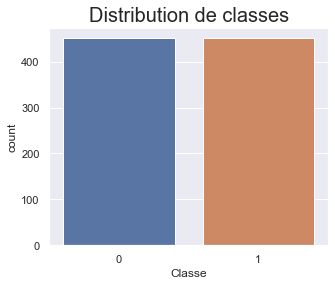

In [118]:
sns.countplot(x=y_train_res).set_title('Distribution de classes', size=20)

In [119]:
#features_scaling
scale = StandardScaler()
X_train = scale.fit_transform(X_train_res)
X_test = scale.fit_transform(X_test)

X_train

array([[-0.08832236, -0.0778443 , -0.43501535, ..., -0.32672384,
        -0.31410217, -0.34108156],
       [-0.60034352, -0.58857325,  1.36631086, ..., -0.32672384,
        -0.31410217, -0.34108156],
       [ 0.00649637,  0.01673514, -0.43501535, ..., -0.32672384,
        -0.31410217, -0.34108156],
       ...,
       [-0.22367614, -0.21285648, -0.43501535, ..., -0.32672384,
        -0.31410217, -0.34108156],
       [-0.4449088 , -0.4335308 ,  0.66400092, ..., -0.32672384,
        -0.31410217, -0.34108156],
       [-0.82790849, -0.8155639 ,  2.0106578 , ..., -0.32672384,
        -0.31410217, -0.34108156]])

# Entrainement du modèle avec smote

1.RandomForest ou forêt aléatoire

In [120]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_train, y_train_res.ravel())
y_pred_rfc=rfc.predict(X_test)
print('Precision du modèle avec 100 arbres: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rfc)))

Precision du modèle avec 100 arbres: 1.0000


In [121]:
from sklearn.metrics import confusion_matrix

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print('Matrice de confusion\n\n', cm_rfc)
print('\n Vrais Positives(VP)', cm_rfc[0,0])
print('\n vrais Negatives(VN)', cm_rfc[1,1])
print('\n Faux Negatives(FN)', cm_rfc[0,1])
print('\n Faux Positives(FP)', cm_rfc[1,0])

Matrice de confusion

 [[112   0]
 [  0  46]]

 Vrais Positives(VP) 112

 vrais Negatives(VN) 46

 Faux Negatives(FN) 0

 Faux Positives(FP) 0


<AxesSubplot:>

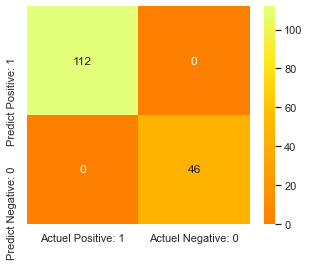

In [122]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_rfc, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='Wistia_r')

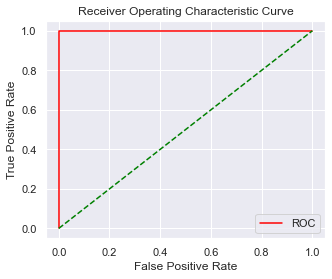

In [123]:
fper, tper, thresholds = roc_curve(y_test, y_pred_rfc)
plot_roc_curve(fper, tper)

In [124]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        46

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [125]:
print(classification_report_imbalanced(y_test, y_pred_rfc))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00       112
          1       1.00      1.00      1.00      1.00      1.00      1.00        46

avg / total       1.00      1.00      1.00      1.00      1.00      1.00       158



In [126]:
print(accuracy_score(y_test, y_pred_rfc))
print(f1_score(y_test, y_pred_rfc))
print(roc_auc_score(y_test, y_pred_rfc))

1.0
1.0
1.0


In [127]:
tp = cm_rfc[0,0]
tn = cm_rfc[1,1]
fn = cm_rfc[0,1]
fp = cm_rfc[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_rfc)*100)

Accuracy 100.0
taux d'erreur 0.0
Sensitivity 100.0
Specitivity 100.0
Precision 100.0
Rappel 100.0
F1-score 100.0
MCC 100.0


2.Algorthme SVM

In [128]:
from sklearn.svm import SVC

svc= SVC()
svc.fit(X_train, y_train_res)
y_pred_svm = svc.predict(X_test)

print(svc.score(X_test, y_test))
print('précision du modèle support vector machine : {0:0.4f}' .format(accuracy_score(y_test, y_pred_svm)))

1.0
précision du modèle support vector machine : 1.0000


<AxesSubplot:>

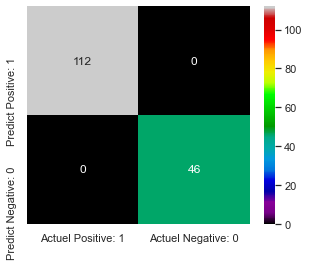

In [129]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_svm, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='nipy_spectral')

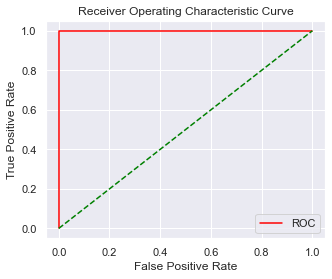

In [130]:
fper, tper, thresholds = roc_curve(y_test, y_pred_svm)
plot_roc_curve(fper, tper)

In [131]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        46

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [132]:
print(classification_report_imbalanced(y_test, y_pred_svm))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00       112
          1       1.00      1.00      1.00      1.00      1.00      1.00        46

avg / total       1.00      1.00      1.00      1.00      1.00      1.00       158



In [133]:
print(accuracy_score(y_test, y_pred_svm))
print(f1_score(y_test, y_pred_svm))
print(roc_auc_score(y_test, y_pred_svm))


1.0
1.0
1.0


In [134]:
tp = cm_svm[0,0]
tn = cm_svm[1,1]
fn = cm_svm[0,1]
fp = cm_svm[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_svm)*100)

Accuracy 100.0
taux d'erreur 0.0
Sensitivity 100.0
Specitivity 100.0
Precision 100.0
Rappel 100.0
F1-score 100.0
MCC 100.0


3.Regression logistique

In [135]:
#Regression logistique
log = LogisticRegression()
log.fit(X_train, y_train_res)
y_pred_log =log.predict(X_test)
print(log.score(X_test, y_test))
print('Précision du modèle Regression logistique: {0:0.4f}' .format(accuracy_score(y_test.ravel(), y_pred_log)))

1.0
Précision du modèle Regression logistique: 1.0000


In [136]:
cm_log= confusion_matrix(y_test, y_pred_log)

print('Matrice de confusion\n\n', cm_log)
print('\n Vrais Positives(VP)', cm_log[0,0])
print('\n vrais Negatives(VN)', cm_log[1,1])
print('\n Faux Negatives(FN)', cm_log[0,1])
print('\n Faux Positives(FP)', cm_log[1,0])

Matrice de confusion

 [[112   0]
 [  0  46]]

 Vrais Positives(VP) 112

 vrais Negatives(VN) 46

 Faux Negatives(FN) 0

 Faux Positives(FP) 0


<AxesSubplot:>

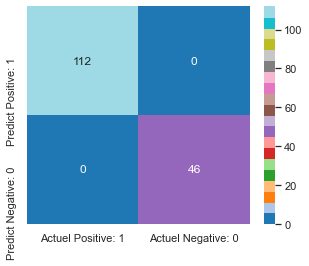

In [137]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_log, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='tab20')

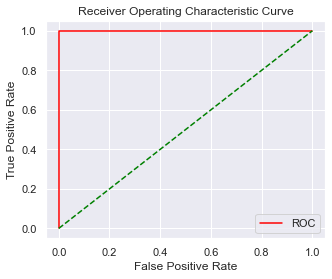

In [138]:
fper, tper, thresholds = roc_curve(y_test, y_pred_log)
plot_roc_curve(fper, tper)

In [139]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        46

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [140]:
print(classification_report_imbalanced(y_test, y_pred_log))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00       112
          1       1.00      1.00      1.00      1.00      1.00      1.00        46

avg / total       1.00      1.00      1.00      1.00      1.00      1.00       158



In [141]:
print(accuracy_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))
print(roc_auc_score(y_test, y_pred_log))

1.0
1.0
1.0


In [142]:
tp = cm_log[0,0]
tn = cm_log[1,1]
fn = cm_log[0,1]
fp = cm_log[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_log)*100)

Accuracy 100.0
taux d'erreur 0.0
Sensitivity 100.0
Specitivity 100.0
Precision 100.0
Rappel 100.0
F1-score 100.0
MCC 100.0


# 21.Techniques de souséchantillonage : Randomundersampling

In [143]:
#Spliter les données pour avoir la matrices X et y
X=data.drop(['Classe'], axis=1)
y=data['Classe']

In [144]:
#Spliter les données en données d'entrainementet de test
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size =0.2, random_state=0)

In [145]:
y_train.value_counts()

0    451
1    177
Name: Classe, dtype: int64

In [146]:
from imblearn.under_sampling import RandomUnderSampler
ran = RandomUnderSampler()

X_train_res, y_train_res = ran.fit_resample(X_train, y_train)
y_train_res.value_counts()

1    177
0    177
Name: Classe, dtype: int64

Text(0.5, 1.0, 'Distribution de classes')

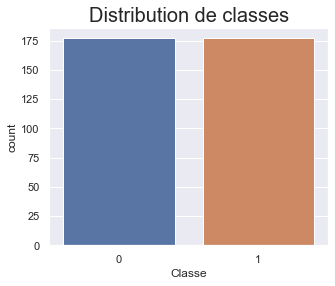

In [147]:
sns.countplot(x=y_train_res).set_title('Distribution de classes', size=20)

In [148]:
#features_scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train_res)
X_test = sc.fit_transform(X_test)
X_train

array([[ 0.05190545,  0.06202303, -0.40799532, ..., -0.38161639,
        -0.36192598,  2.52487623],
       [-0.31158674, -0.30055597, -0.40799532, ..., -0.38161639,
         2.7629959 , -0.39605902],
       [-0.34793595, -0.33681387,  2.53475824, ..., -0.38161639,
         2.7629959 , -0.39605902],
       ...,
       [-0.74777736, -0.73565078, -0.40799532, ..., -0.38161639,
        -0.36192598, -0.39605902],
       [ 0.08825467,  0.09828093, -0.40799532, ..., -0.38161639,
        -0.36192598, -0.39605902],
       [-0.16618986, -0.15552437, -0.40799532, ..., -0.38161639,
        -0.36192598, -0.39605902]])

# Entrainement du modèles

1. RandomForest

In [149]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_100.fit(X_train, y_train_res.ravel())

y_pred_rfc100 = rfc.predict(X_test)

print('Precision du modèle avec 100 arbres: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rfc100)))

Precision du modèle avec 100 arbres: 1.0000


In [150]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc100)
print('Matrice de confusion\n\n', cm_rfc)
print('\n Vrais Positives(VP)', cm_rfc[0,0])
print('\n vrais Negatives(VN)', cm_rfc[1,1])
print('\n Faux Negatives(FN)', cm_rfc[0,1])
print('\n Faux Positives(FP)', cm_rfc[1,0])

Matrice de confusion

 [[112   0]
 [  0  46]]

 Vrais Positives(VP) 112

 vrais Negatives(VN) 46

 Faux Negatives(FN) 0

 Faux Positives(FP) 0


<AxesSubplot:>

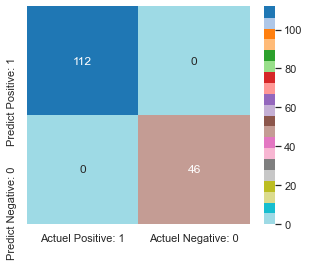

In [151]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_rfc, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='tab20_r')

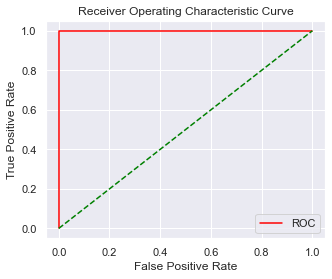

In [152]:
fper, tper, thresholds = roc_curve(y_test, y_pred_rfc100)
plot_roc_curve(fper, tper)

In [153]:
print(classification_report(y_test, y_pred_rfc100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        46

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [154]:
print(classification_report_imbalanced(y_test, y_pred_rfc100))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00       112
          1       1.00      1.00      1.00      1.00      1.00      1.00        46

avg / total       1.00      1.00      1.00      1.00      1.00      1.00       158



In [155]:
print(accuracy_score(y_test, y_pred_rfc100))
print(f1_score(y_test, y_pred_rfc100))
print(roc_auc_score(y_test, y_pred_rfc100))

1.0
1.0
1.0


In [156]:
tp = cm_rfc[0,0]
tn = cm_rfc[1,1]
fn = cm_rfc[0,1]
fp = cm_rfc[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_rfc100)*100)

Accuracy 100.0
taux d'erreur 0.0
Sensitivity 100.0
Specitivity 100.0
Precision 100.0
Rappel 100.0
F1-score 100.0
MCC 100.0


2. Algorithme SVM

In [157]:
svc= SVC()
svc.fit(X_train, y_train_res.ravel())
y_pred_svm= svc.predict(X_test)
print('précision du modèle : {0:0.4f}' .format(accuracy_score(y_test, y_pred_svm)))

précision du modèle : 1.0000


In [158]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print('Matrice de confusion\n\n', cm_svm)
print('\n Vrais Positives(VP)', cm_svm[0,0])
print('\n vrais Negatives(VN)', cm_svm[1,1])
print('\n Faux Negatives(FN)', cm_svm[0,1])
print('\n Faux Positives(FP)', cm_svm[1,0])

Matrice de confusion

 [[112   0]
 [  0  46]]

 Vrais Positives(VP) 112

 vrais Negatives(VN) 46

 Faux Negatives(FN) 0

 Faux Positives(FP) 0


<AxesSubplot:>

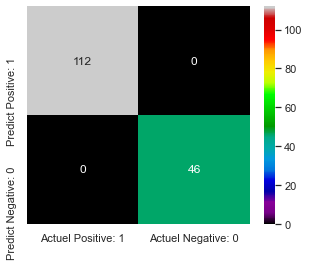

In [159]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_svm, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='nipy_spectral')

In [160]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        46

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [161]:
print(classification_report_imbalanced(y_test, y_pred_svm))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00       112
          1       1.00      1.00      1.00      1.00      1.00      1.00        46

avg / total       1.00      1.00      1.00      1.00      1.00      1.00       158



In [162]:
tp = cm_svm[0,0]
tn = cm_svm[1,1]
fn = cm_svm[0,1]
fp = cm_svm[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_svm)*100)

Accuracy 100.0
taux d'erreur 0.0
Sensitivity 100.0
Specitivity 100.0
Precision 100.0
Rappel 100.0
F1-score 100.0
MCC 100.0


3.regression logistique

In [163]:
#Regression logistique 
log = LogisticRegression(random_state=0)
log.fit(X_train, y_train_res)
y_pred_log = log.predict(X_test)
print('Précision du modèle Regression logistique: {0:0.4f}' .format(accuracy_score(y_test, y_pred_log)))

Précision du modèle Regression logistique: 1.0000


In [164]:
cm_log = confusion_matrix(y_test, y_pred_log)
print('Matrice de confusion\n\n', cm_log)
print('\n Vrais Positives(VP)', cm_log[0,0])
print('\n vrais Negatives(VN)', cm_log[1,1])
print('\n Faux Negatives(FN)', cm_log[0,1])
print('\n Faux Positives(FP)', cm_log[1,0])

Matrice de confusion

 [[112   0]
 [  0  46]]

 Vrais Positives(VP) 112

 vrais Negatives(VN) 46

 Faux Negatives(FN) 0

 Faux Positives(FP) 0


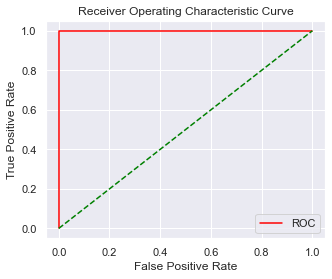

In [165]:
fper, tper, thresholds = roc_curve(y_test, y_pred_log)
plot_roc_curve(fper, tper) 

In [166]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        46

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [167]:
print(classification_report_imbalanced(y_test, y_pred_log))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00       112
          1       1.00      1.00      1.00      1.00      1.00      1.00        46

avg / total       1.00      1.00      1.00      1.00      1.00      1.00       158



In [168]:
print(accuracy_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))
print(roc_auc_score(y_test, y_pred_log))

1.0
1.0
1.0


In [169]:
tp = cm_log[0,0]
tn = cm_log[1,1]
fn = cm_log[0,1]
fp = cm_log[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_log)*100)

Accuracy 100.0
taux d'erreur 0.0
Sensitivity 100.0
Specitivity 100.0
Precision 100.0
Rappel 100.0
F1-score 100.0
MCC 100.0


# 22 Sous-échantillonnage à l'aide de K-Means

In [170]:
X=data.drop(['Classe'], axis=1)
y=data['Classe']

In [171]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size =0.2, random_state=0)
X_train.shape

(628, 18)

In [172]:
from imblearn.under_sampling import ClusterCentroids
clus = ClusterCentroids(random_state=0)

X_train_clus, y_train_clus=clus.fit_resample(X_train, y_train)
y_train_clus.value_counts()

1    177
0    177
Name: Classe, dtype: int64

In [173]:
#features_scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train_clus)
X_test = sc.fit_transform(X_test)

# Entrainement du modèles

1.RandomForest ou forêt aléatoire

In [174]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_train, y_train_clus.ravel())
y_pred_rfc=rfc.predict(X_test)
print('Precision du modèle avec 100 arbres: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rfc)))

Precision du modèle avec 100 arbres: 1.0000


In [175]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc100)
print('Matrice de confusion\n\n', cm_rfc)
print('\n Vrais Positives(VP)', cm_rfc[0,0])
print('\n vrais Negatives(VN)', cm_rfc[1,1])
print('\n Faux Negatives(FN', cm_rfc[0,1])
print('\n Faux Positives(FP))', cm_rfc[1,0])

Matrice de confusion

 [[112   0]
 [  0  46]]

 Vrais Positives(VP) 112

 vrais Negatives(VN) 46

 Faux Negatives(FN 0

 Faux Positives(FP)) 0


<AxesSubplot:>

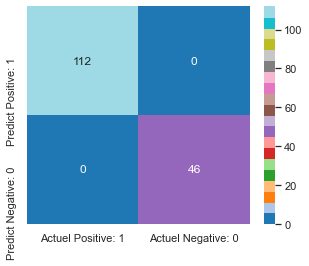

In [176]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_rfc, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='tab20')

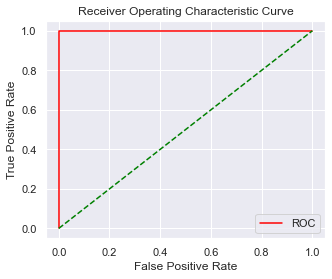

In [177]:
fper, tper, thresholds = roc_curve(y_test, y_pred_rfc100)
plot_roc_curve(fper, tper)

In [178]:
print(classification_report(y_test, y_pred_rfc100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        46

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [179]:
print(classification_report_imbalanced(y_test, y_pred_rfc100))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00       112
          1       1.00      1.00      1.00      1.00      1.00      1.00        46

avg / total       1.00      1.00      1.00      1.00      1.00      1.00       158



In [180]:
print(accuracy_score(y_test, y_pred_rfc100))
print(f1_score(y_test, y_pred_rfc100))
print(roc_auc_score(y_test, y_pred_rfc100))

1.0
1.0
1.0


In [181]:
tp = cm_rfc[0,0]
tn = cm_rfc[1,1]
fn = cm_rfc[0,1]
fp = cm_rfc[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_rfc100)*100)

Accuracy 100.0
taux d'erreur 0.0
Sensitivity 100.0
Specitivity 100.0
Precision 100.0
Rappel 100.0
F1-score 100.0
MCC 100.0


2.Algorithme SVM

In [182]:
svc= SVC()
svc.fit(X_train, y_train_clus.ravel())
y_pred_svm= svc.predict(X_test)
print('précision du modèle : {0:0.4f}' .format(accuracy_score(y_test, y_pred_svm)))

précision du modèle : 0.9937


In [183]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print('Matrice de confusion\n\n', cm_svm)
print('\n Vrais Positives(VP)', cm_svm[0,0])
print('\n vrais Negatives(VN)', cm_svm[1,1])
print('\n Faux Negatives(FN)', cm_svm[0,1])
print('\n Faux Positives(FP)', cm_svm[1,0])

Matrice de confusion

 [[111   1]
 [  0  46]]

 Vrais Positives(VP) 111

 vrais Negatives(VN) 46

 Faux Negatives(FN) 1

 Faux Positives(FP) 0


<AxesSubplot:>

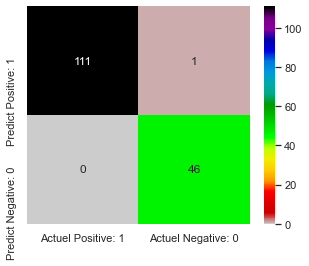

In [184]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_svm, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='nipy_spectral_r')

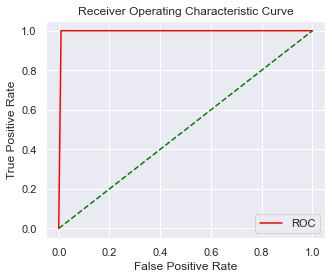

In [185]:
fper, tper, thresholds = roc_curve(y_test, y_pred_svm)
plot_roc_curve(fper, tper)

In [186]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       112
           1       0.98      1.00      0.99        46

    accuracy                           0.99       158
   macro avg       0.99      1.00      0.99       158
weighted avg       0.99      0.99      0.99       158



In [187]:
print(classification_report_imbalanced(y_test, y_pred_svm))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      1.00      1.00      1.00      0.99       112
          1       0.98      1.00      0.99      0.99      1.00      0.99        46

avg / total       0.99      0.99      1.00      0.99      1.00      0.99       158



In [188]:
print(accuracy_score(y_test, y_pred_svm))
print(f1_score(y_test, y_pred_svm))
print(roc_auc_score(y_test, y_pred_svm))

0.9936708860759493
0.989247311827957
0.9955357142857143


In [189]:
tp = cm_svm[0,0]
tn = cm_svm[1,1]
fn = cm_svm[0,1]
fp = cm_svm[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_svm)*100)

Accuracy 99.36708860759494
taux d'erreur 0.6329113924050633
Sensitivity 99.10714285714286
Specitivity 100.0
Precision 100.0
Rappel 99.10714285714286
F1-score 99.55156950672645
MCC 98.4878064752998


3. Regression Logistique

In [190]:
#Regression logistique 
log = LogisticRegression(random_state=0)
log.fit(X_train, y_train_res)
y_pred_log = log.predict(X_test)
print('Précision du modèle Regression logistique: {0:0.4f}' .format(accuracy_score(y_test, y_pred_log)))

Précision du modèle Regression logistique: 1.0000


In [191]:
cm_log = confusion_matrix(y_test, y_pred_log)
print('Matrice de confusion\n\n', cm_log)
print('\n Vrais Positives(VP)', cm_log[0,0])
print('\n vrais Negatives(VN)', cm_log[1,1])
print('\n Faux Negatives(FN)', cm_log[0,1])
print('\n Faux Positives(FP)', cm_log[1,0])

Matrice de confusion

 [[112   0]
 [  0  46]]

 Vrais Positives(VP) 112

 vrais Negatives(VN) 46

 Faux Negatives(FN) 0

 Faux Positives(FP) 0


<AxesSubplot:>

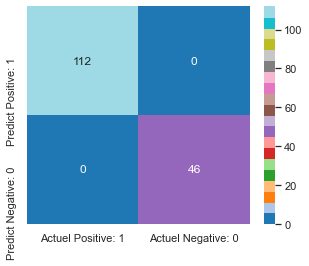

In [192]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_log, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='tab20')

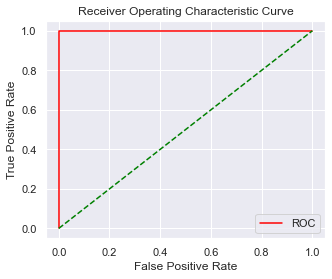

In [193]:
fper, tper, thresholds = roc_curve(y_test, y_pred_log)
plot_roc_curve(fper, tper)

In [194]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        46

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [195]:
print(classification_report_imbalanced(y_test, y_pred_log))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00       112
          1       1.00      1.00      1.00      1.00      1.00      1.00        46

avg / total       1.00      1.00      1.00      1.00      1.00      1.00       158



In [196]:
print(accuracy_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))
print(roc_auc_score(y_test, y_pred_log))

1.0
1.0
1.0


In [197]:
tp = cm_log[0,0]
tn = cm_log[1,1]
fn = cm_log[0,1]
fp = cm_log[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_log)*100)

Accuracy 100.0
taux d'erreur 0.0
Sensitivity 100.0
Specitivity 100.0
Precision 100.0
Rappel 100.0
F1-score 100.0
MCC 100.0


# 23.Souséchantillonage avec NearMiss

In [198]:
#Spliter les données pour avoir la matrices X et y
X=data.drop(['Classe'], axis=1)
y=data['Classe']

In [199]:
#Spliter les données en données d'entrainementet de test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size =0.2, random_state=0)

In [200]:
y_train.value_counts()

0    451
1    177
Name: Classe, dtype: int64

In [201]:
from imblearn.under_sampling import NearMiss

nearmiss = NearMiss()

X_train_miss, y_train_miss= nearmiss.fit_resample(X_train, y_train)

y_train_miss.value_counts()

1    177
0    177
Name: Classe, dtype: int64

Text(0.5, 1.0, 'Equilibrages des classes')

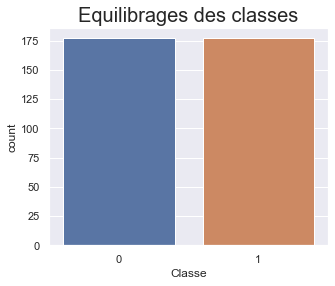

In [202]:
sns.countplot(x=y_train_miss).set_title('Equilibrages des classes', size=20)

In [203]:
#features_scaling

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X_train_miss)
X_test = scale.fit_transform(X_test)

X_train

array([[ 0.09863998,  0.10443317, -0.44760609, ..., -0.34164198,
        -0.38645912, -0.38645912],
       [ 0.09863998,  0.10443317, -0.44760609, ..., -0.34164198,
        -0.38645912, -0.38645912],
       [-0.54310638, -0.5365251 , -0.44760609, ..., -0.34164198,
        -0.38645912, -0.38645912],
       ...,
       [-0.69410552, -0.68733881, -0.44760609, ..., -0.34164198,
        -0.38645912, -0.38645912],
       [ 0.17413955,  0.17984002, -0.44760609, ..., -0.34164198,
        -0.38645912, -0.38645912],
       [-0.09010895, -0.08408397, -0.44760609, ..., -0.34164198,
        -0.38645912, -0.38645912]])

# Entrainement du modèle avec NearMiss

1.RandomForest ou forêt aléatoire

In [204]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_train, y_train_miss)
y_pred_rfc=rfc.predict(X_test)
print(rfc.score(X_test, y_test))
print('Precision du modèle avec 100 arbres: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rfc)))

1.0
Precision du modèle avec 100 arbres: 1.0000


In [205]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print('Matrice de confusion\n\n', cm_rfc)
print('\n Vrais Positives(VP)', cm_rfc[0,0])
print('\n vrais Negatives(VN)', cm_rfc[1,1])
print('\n Faux Negatives(FN)', cm_rfc[0,1])
print('\n Faux Positives(FP)', cm_rfc[1,0])

Matrice de confusion

 [[112   0]
 [  0  46]]

 Vrais Positives(VP) 112

 vrais Negatives(VN) 46

 Faux Negatives(FN) 0

 Faux Positives(FP) 0


<AxesSubplot:>

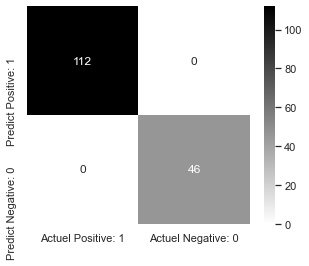

In [206]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_rfc, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='gist_yarg')

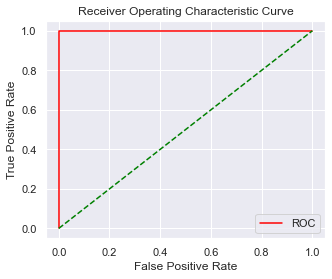

In [207]:
fper, tper, thresholds = roc_curve(y_test, y_pred_rfc)
plot_roc_curve(fper, tper)

In [208]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        46

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [209]:
print(classification_report_imbalanced(y_test, y_pred_rfc))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00       112
          1       1.00      1.00      1.00      1.00      1.00      1.00        46

avg / total       1.00      1.00      1.00      1.00      1.00      1.00       158



In [210]:
print(accuracy_score(y_test, y_pred_rfc))
print(f1_score(y_test, y_pred_rfc))
print(roc_auc_score(y_test, y_pred_rfc))

1.0
1.0
1.0


In [211]:
from sklearn.metrics import matthews_corrcoef
tp = cm_rfc[0,0]
tn = cm_rfc[1,1]
fn = cm_rfc[0,1]
fp = cm_rfc[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_rfc)*100)

Accuracy 100.0
taux d'erreur 0.0
Sensitivity 100.0
Specitivity 100.0
Precision 100.0
Rappel 100.0
F1-score 100.0
MCC 100.0


2.Algorthme SVM

In [212]:
svc= SVC()
svc.fit(X_train, y_train_miss)
y_pred_svm = svc.predict(X_test)

print(rfc.score(X_test, y_test))
print('précision du modèle support vector machine : {0:0.4f}' .format(accuracy_score(y_test, y_pred_svm)))

1.0
précision du modèle support vector machine : 0.9873


In [213]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

print('Matrice de confusion\n\n', cm_svm)
print('\n Vrais Positives(VP)', cm_svm[0,0])
print('\n vrais Negatives(VN)', cm_svm[1,1])
print('\n Faux Negatives(FN)', cm_svm[0,1])
print('\n Faux Positives(FP)', cm_svm[1,0])

Matrice de confusion

 [[110   2]
 [  0  46]]

 Vrais Positives(VP) 110

 vrais Negatives(VN) 46

 Faux Negatives(FN) 2

 Faux Positives(FP) 0


<AxesSubplot:>

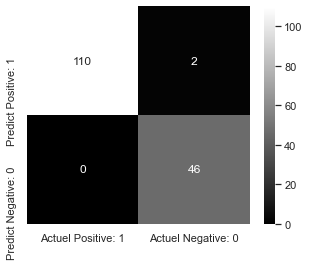

In [214]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_svm, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='gray')

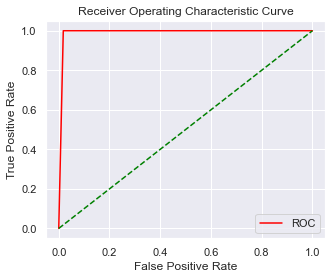

In [215]:
fper, tper, thresholds = roc_curve(y_test, y_pred_svm)
plot_roc_curve(fper, tper)

In [216]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       112
           1       0.96      1.00      0.98        46

    accuracy                           0.99       158
   macro avg       0.98      0.99      0.98       158
weighted avg       0.99      0.99      0.99       158



In [217]:
print(classification_report_imbalanced(y_test, y_pred_svm))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.98      1.00      0.99      0.99      0.98       112
          1       0.96      1.00      0.98      0.98      0.99      0.98        46

avg / total       0.99      0.99      0.99      0.99      0.99      0.98       158



In [218]:
print(accuracy_score(y_test, y_pred_svm))
print(f1_score(y_test, y_pred_svm))
print(roc_auc_score(y_test, y_pred_svm))

0.9873417721518988
0.9787234042553191
0.9910714285714285


In [219]:
tp = cm_svm[0,0]
tn = cm_svm[1,1]
fn = cm_svm[0,1]
fp = cm_svm[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_svm)*100)

Accuracy 98.73417721518987
taux d'erreur 1.2658227848101267
Sensitivity 98.21428571428571
Specitivity 100.0
Precision 100.0
Rappel 98.21428571428571
F1-score 99.09909909909909
MCC 97.0165057139886


3.Regression logistique

In [220]:
#Regression logistique
log = LogisticRegression()
log.fit(X_train, y_train_miss)
y_pred_log =log.predict(X_test)
print(log.score(X_test, y_test))
print('Précision du modèle Regression logistique: {0:0.4f}' .format(accuracy_score(y_test.ravel(), y_pred_log)))

1.0
Précision du modèle Regression logistique: 1.0000


In [221]:
cm_log= confusion_matrix(y_test, y_pred_log)

print('Matrice de confusion\n\n', cm_log)
print('\n Vrais Positives(VP)', cm_log[0,0])
print('\n vrais Negatives(VN)', cm_log[1,1])
print('\n Faux Negatives(FN)', cm_log[0,1])
print('\n Faux Positives(FP)', cm_log[1,0])

Matrice de confusion

 [[112   0]
 [  0  46]]

 Vrais Positives(VP) 112

 vrais Negatives(VN) 46

 Faux Negatives(FN) 0

 Faux Positives(FP) 0


<AxesSubplot:>

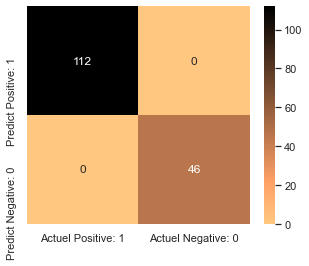

In [222]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_log, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='copper_r')

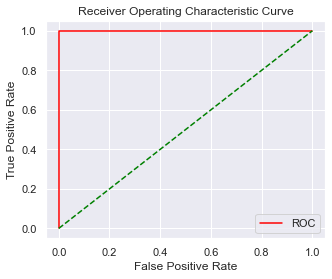

In [223]:
fper, tper, thresholds = roc_curve(y_test, y_pred_log)
plot_roc_curve(fper, tper)

In [224]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        46

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [225]:
print(classification_report_imbalanced(y_test, y_pred_log))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00       112
          1       1.00      1.00      1.00      1.00      1.00      1.00        46

avg / total       1.00      1.00      1.00      1.00      1.00      1.00       158



In [226]:
print(accuracy_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))
print(roc_auc_score(y_test, y_pred_log))

1.0
1.0
1.0


In [227]:
tp = cm_log[0,0]
tn = cm_log[1,1]
fn = cm_log[0,1]
fp = cm_log[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec)/(precision+rec)
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_log)*100)

Accuracy 100.0
taux d'erreur 0.0
Sensitivity 100.0
Specitivity 100.0
Precision 100.0
Rappel 100.0
F1-score 100.0
MCC 100.0
